# Import libraries and Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Wrangling_functions as f1
import Plot_functions as f2
%matplotlib inline

In [2]:
df = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv')

# Pre-Processing

In [4]:
# Remove missing value for both EdLevel and DevType
df_edu_devtype_ = df[['EdLevel','DevType']][~(df['EdLevel'].isnull() | df['DevType'].isnull())]

# Rename value for education level
df_edu_devtype_['EdLevel'].replace({'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
                                    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
                                    'Some college/university study without earning a degree':'Some college/university without degree',
                                    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
                                    'Associate degree (A.A., A.S., etc.)':'Associate degree',
                                    'Professional degree (JD, MD, etc.)':'Professional degree'
                                    }, inplace=True)
EduLevel_rename = ['Bachelor’s degree','Master’s degree','Some college/university without degree',
                   'Doctoral degree','Associate degree','Professional degree']
df_edu_devtype_['EdLevel'] = df_edu_devtype_['EdLevel'].apply(lambda x: 'Others' if x not in EduLevel_rename else x)
df_edu_devtype_.head()

,EdLevel,DevType
2,Master’s degree,Data scientist or machine learning specialist;...
3,Bachelor’s degree,"Developer, full-stack"
4,Bachelor’s degree,"Developer, front-end;Developer, full-stack;Dev..."
7,Some college/university without degree,"Developer, full-stack;Student"
8,Master’s degree,"Developer, back-end"


In [5]:
# Categorize DevType column into job groups
Dev = ['Developer, back-end','Developer, desktop or enterprise applications','Developer, embedded applications or devices',
       'Developer, front-end','Developer, full-stack','Developer, game or graphics','Developer, mobile',
       'Developer, QA or test']
SysAdmin_DevOps = ['System administrator','DevOps specialist']
Security = ['Security professional']
Blockchain = ['Blockchain']
Cloud = ['Cloud infrastructure engineer']
Data = ['Data or business analyst','Data scientist or machine learning specialist','Database administrator',
        'Engineer, data']
Academia = ['Academic researcher','Educator','Scientist','Educator']
Others = ['Designer','Engineer, site reliability','Engineering manager','Marketing or sales professional',
          'Product manager','Project manager','Scientist','Senior Executive (C-Suite, VP, etc.)','Student',
          'Other (please specify):']

# Analyze all DevType

In [6]:
# Replace value in DevType column
rename_dev_type = {'Dev':Dev,
                   'SysAdmin/DevOps':SysAdmin_DevOps,
                   'Security':Security,
                   'Blockchain':Blockchain,
                   'Cloud':Cloud,
                   'Data':Data,
                   'Academia':Academia,
                   'Others':Others
                   }

df_rename = f1.rename_to_df_func(df = df_edu_devtype_,
                                 col = 'DevType',
                                 separator = ';',
                                 rename_val_dict = rename_dev_type)
df_rename.head()

,EdLevel,DevType
2,Master’s degree,Data;Dev;Others
3,Bachelor’s degree,Dev
4,Bachelor’s degree,Dev
7,Some college/university without degree,Dev;Others
8,Master’s degree,Dev


In [7]:
# Separate column 'DevType' into multiple ones
df_transform = f1.separate_column_func(df_rename = df_rename,
                                       col = 'DevType',
                                       separator = ';')
df_transform.head()

,EdLevel,DevType_1,DevType_2,DevType_3,DevType_4,DevType_5,DevType_6,DevType_7,DevType_8
2,Master’s degree,Data,Dev,Others,None,None,None,None,None
3,Bachelor’s degree,Dev,None,None,None,None,None,None,None
4,Bachelor’s degree,Dev,None,None,None,None,None,None,None
7,Some college/university without degree,Dev,Others,None,None,None,None,None,None
8,Master’s degree,Dev,None,None,None,None,None,None,None


In [8]:
# Group by and pivot to get value count for each education level as per dev type
val_count_df = f1.groupby_pivot_df_func(df_transform)
val_count_df

EduLevel,DevType,Some college/university without degree,Associate degree,Bachelor’s degree,Master’s degree,Doctoral degree,Professional degree,Others
0,Academia,413.0,80.0,1293.0,1641.0,1041.0,107.0,325.0
1,Blockchain,185.0,48.0,565.0,298.0,32.0,19.0,152.0
2,Cloud,728.0,170.0,2396.0,1364.0,119.0,81.0,422.0
3,Data,1353.0,339.0,4261.0,3244.0,741.0,251.0,871.0
4,Dev,6671.0,1732.0,24832.0,12035.0,1096.0,895.0,4567.0
5,Others,3123.0,641.0,7851.0,4699.0,1062.0,366.0,2591.0
6,Security,350.0,78.0,719.0,461.0,55.0,36.0,226.0
7,SysAdmin/DevOps,1522.0,384.0,3827.0,2188.0,258.0,164.0,963.0


d:\UDACITY\Data Scientist\Lesson 1\Project 1\Stackoverflow-2022-insight\Plot_functions.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in y_axis_values])


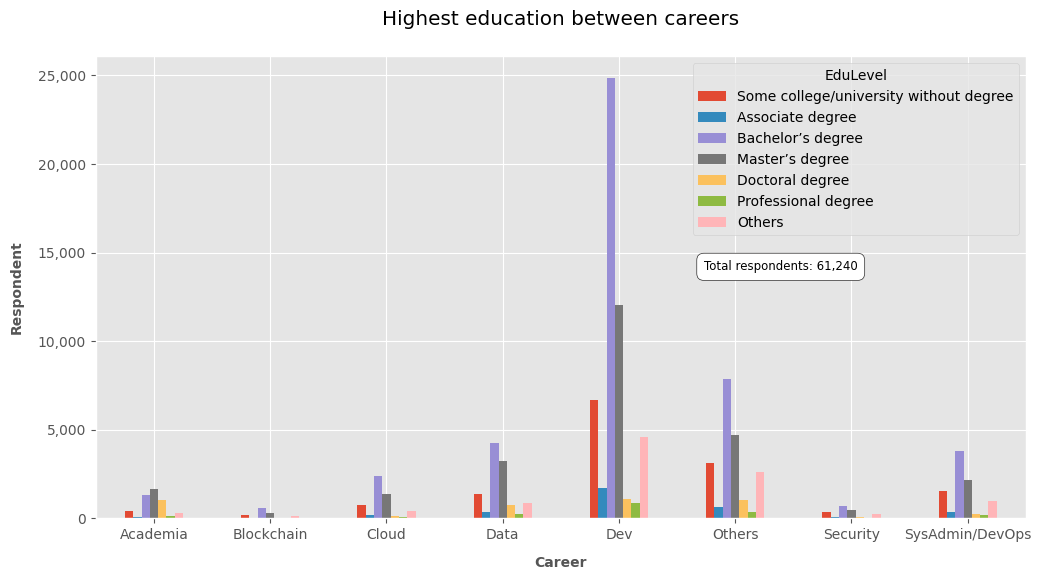

In [11]:
# Group bar chart
f2.group_bar_chart(val_count_df = val_count_df,
                  common_col = 'DevType',
                  title = 'Highest education between careers',
                  xlabel = 'Career',
                  ylabel = 'Respondent',
                  x_fig = 12, y_fig = 6)

# Add respondent total to the chart
total_respondent = df_transform.shape[0]
plt.text(4.73, 14000,
        'Total respondents: {0}'.format('{:,.0f}'.format(total_respondent)),
         fontsize = 8.5,
         bbox = dict(facecolor = '#ffffff', edgecolor = '#2c2b2b', boxstyle = 'round,pad=.6'));

# Analyze DevType = Data

In [12]:
DA_BA = ['Data or business analyst']
DS_ML = ['Data scientist or machine learning specialist']
DBA = ['Database administrator']
DE = ['Engineer, data']

data_rename_dict = {'Data/Business analyst': DA_BA,
                   'Data scientist/ML engineer': DS_ML,
                   'Database administrator': DBA,
                   'Data Engineer': DE}

d:\UDACITY\Data Scientist\Lesson 1\Project 1\Stackoverflow-2022-insight\Plot_functions.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in y_axis_values])


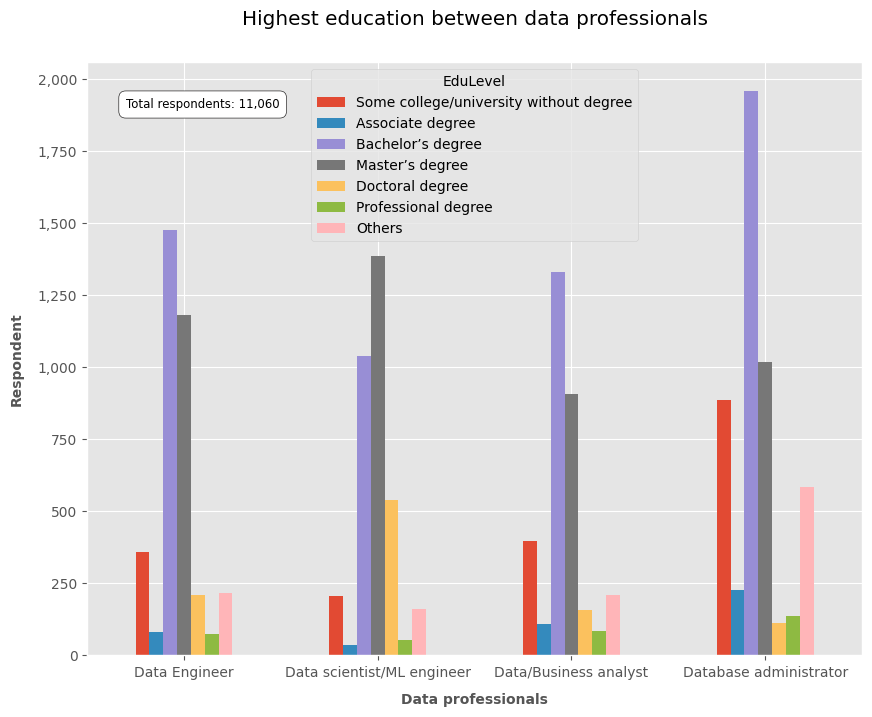

In [14]:
# Tranform df and get group bar chart
f1.analyze_dev_type(df = df_edu_devtype_,
                    col = 'DevType',
                    separator = ';',
                    rename_val_dict = data_rename_dict,
                    bar_chart_type = 'vertical',
                    chart_title = 'Highest education between data professionals',
                    chart_xlabel = 'Data professionals',
                    chart_ylabel = 'Respondent',
                    chart_x_fig = 10, chart_y_fig = 7.7)

# Add respondent total to the chart
df_rename_1 = f1.rename_to_df_func(df = df_edu_devtype_,
                                   col = 'DevType', 
                                   separator = ';', 
                                   rename_val_dict = data_rename_dict)
total_respondent = df_rename_1[df_rename_1['DevType']!=''].shape[0]

plt.text(-0.3, 1900,
        'Total respondents: {0}'.format('{:,.0f}'.format(total_respondent)),
         fontsize = 8.5,
         bbox = dict(facecolor = '#ffffff', edgecolor = '#2c2b2b', boxstyle = 'round,pad=.6'));

# Analyze DevType = Dev

In [15]:
backend = ['Developer, back-end']
desktop = ['Developer, desktop or enterprise applications']
embedded = ['Developer, embedded applications or devices']
frontend = ['Developer, front-end']
full_stack = ['Developer, full-stack']
game = ['Developer, game or graphics']
mobile = ['Developer, mobile']
QA = ['Developer, QA or test']

dev_rename_dict = {'Backend': backend,
                   'Desktop/Enterprise applications': desktop,
                   'Embedded applications/Devices': embedded,
                   'Frontend': frontend,
                   'Full stack': full_stack,
                   'Game/Graphics': game,
                   'Mobile': mobile,
                   'QA/tester': QA}

d:\UDACITY\Data Scientist\Lesson 1\Project 1\Stackoverflow-2022-insight\Plot_functions.py:252: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(i) for i in x_axis_values])


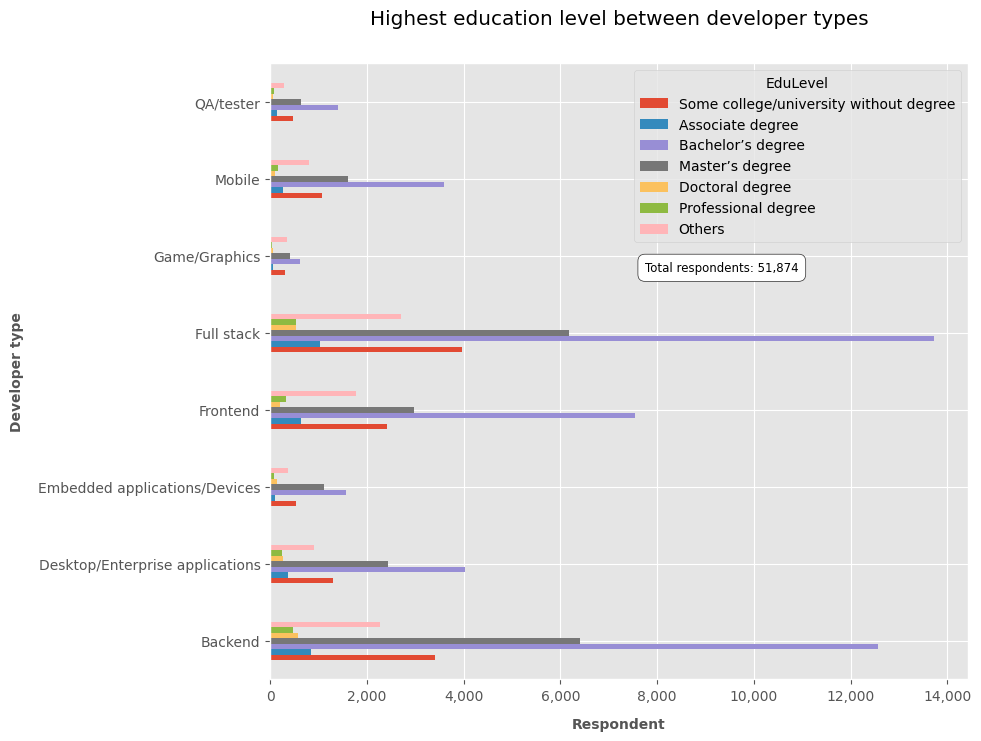

In [16]:
# Tranform df and get horizontal group bar chart
f1.analyze_dev_type(df = df_edu_devtype_,
                    col = 'DevType',
                    separator = ';',
                    rename_val_dict = dev_rename_dict,
                    bar_chart_type = 'horizontal',
                    chart_title = 'Highest education level between developer types',
                    chart_xlabel = 'Respondent',
                    chart_ylabel = 'Developer type',
                    chart_x_fig = 9, chart_y_fig = 8)

# Add respondent total to the chart
df_rename_2 = f1.rename_to_df_func(df = df_edu_devtype_,
                                   col = 'DevType', 
                                   separator = ';', 
                                   rename_val_dict = dev_rename_dict)
total_respondent = df_rename_2[df_rename_2['DevType']!=''].shape[0]

plt.text(7750, 4.8,
        'Total respondents: {0}'.format('{:,.0f}'.format(total_respondent)),
         fontsize = 8.5,
         bbox = dict(facecolor = '#ffffff', edgecolor = '#2c2b2b', boxstyle = 'round,pad=.6'));